<a href="https://colab.research.google.com/github/mrrkdas/LazyProgrammer-DeepLearning-Course/blob/main/ANN_for_Image_Classification_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Getting to know the data

1


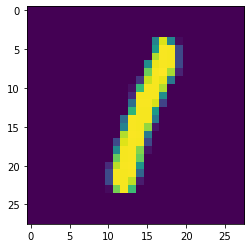

In [9]:
# Run cell mutiple times to see data
import random

i = random.randint(0, 60001)
print(y_train[i])
plt.imshow(X_train[i])

In [10]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

## Preprocessing

In [11]:
# Standardizing
X_train_stand = X_train / 255.0
X_test_stand = X_test / 255.0

In [13]:
X_train_stand = np.reshape(X_train_stand, (60000, 784))
X_test_stand = np.reshape(X_test_stand, (10000, 784))

## Model using functional API

In [16]:
inputs = tf.keras.Input((784, ))

dense = tf.keras.layers.Dense(128, activation = 'relu')

x = dense(inputs)

outputs = tf.keras.layers.Dense(10, activation = 'softmax') (x)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
r = model.fit(X_train_stand, y_train, validation_data = (X_test_stand, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2665 - accuracy: 0.9233 - val_loss: 0.1417 - val_accuracy: 0.9600
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1166 - accuracy: 0.9652 - val_loss: 0.1079 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0811 - accuracy: 0.9750 - val_loss: 0.0872 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0749 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0792 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0706 - val_accuracy

## Plotting

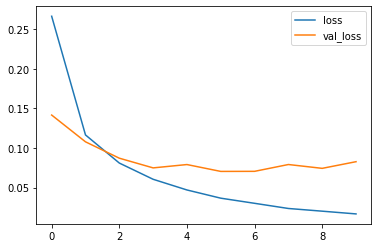

In [19]:
# Loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

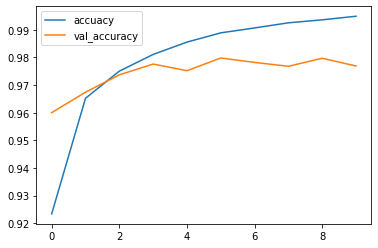

In [21]:
# Accuracy
plt.plot(r.history['accuracy'], label = 'accuacy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

### The plotting of the confusion matrix did not work but I think, since the accuracy is about the same, the confusion matrix would have looked simular